This data was randomly generated on the web. 
It is a data set from sales and it has a couple of descriptive columns (like region, country etc.) and the others are numerical and date columns.  
For this project i will try to demonstrate what we can do with this data, as a data science project.

# Importing all the tools needed for this project

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly as pl
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.renderers.default='browser'
import plotly.subplots 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sea
from sklearn.preprocessing import OrdinalEncoder
from itertools import combinations
from collections import Counter

Importing the data set I got just generated.  
This was a .txt file which I had to transform and save localy on my pc.  
In order to speed up this proces of loading and preparing the data in the future I will use the completed .csv file instead.

Here are some of the sites to use if you want to generate your own data:  

https://www.mockaroo.com/  
http://www.randat.com/  
https://extendsclass.com/csv-generator.html  
https://www.onlinedatagenerator.com/

In [2]:
'''filename = 'C:/Users/Ice i Nice/Desktop/500000_Sales_Records.txt'
data = np.loadtxt(filename, delimiter=',', skiprows=0, dtype=str)
data=pd.DataFrame(data)
data.to_csv('sales.csv', index=False)'''
sales=pd.read_csv('C:/Users/Ice i Nice/Desktop/github/sales.csv', low_memory=False)
sales.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,region,country,item_type,sales_channel,order_priority,Order_date,order_id,Ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
3,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
4,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28


As we can see from the first few items in our data, there is a row on the top that we have to replace with the second one.  
In the second row we have the headers of the columns and we'll need those to reffer the data.

In [3]:
sales.columns = sales.iloc[0]
sales = sales.reindex(sales.index.drop(0)).reset_index(drop=True)
sales.head()

,region,country,item_type,sales_channel,order_priority,Order_date,order_id,Ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18


## Editing the data   
Now we can start editing the data we have in order to get some new features we can use later for exploration.  
First thing is to change the columns in the types we need.

In [4]:
sales=sales.astype({'region':str,'country':str,'item_type':str,'sales_channel':str,'order_priority':str,'Order_date':str,'order_id':int,'Ship_date':str,'units_sold':int,'unit_price':float,'unit_cost':float,'total_revenue':float,'total_cost':float,'total_profit':float})

in order to replace the capital letters in the date column i will create new ones and delete the old.

In [5]:
sales['order_date']=pd.to_datetime(sales['Order_date'])
sales['ship_date']=pd.to_datetime(sales['Ship_date'])

In [6]:
sales.drop('Ship_date',axis=1,inplace=True)
sales.drop('Order_date',axis=1,inplace=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   region          500000 non-null  object        
 1   country         500000 non-null  object        
 2   item_type       500000 non-null  object        
 3   sales_channel   500000 non-null  object        
 4   order_priority  500000 non-null  object        
 5   order_id        500000 non-null  int32         
 6   units_sold      500000 non-null  int32         
 7   unit_price      500000 non-null  float64       
 8   unit_cost       500000 non-null  float64       
 9   total_revenue   500000 non-null  float64       
 10  total_cost      500000 non-null  float64       
 11  total_profit    500000 non-null  float64       
 12  order_date      500000 non-null  datetime64[ns]
 13  ship_date       500000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(5), in

# Simple exploration

In [7]:
sales['year']=pd.DatetimeIndex(sales['order_date']).year
year=sales.year.unique()

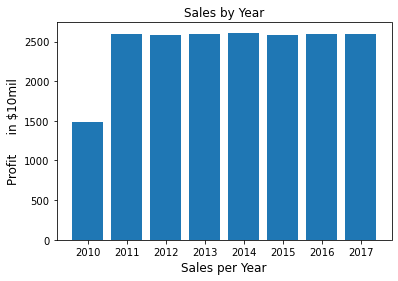

In [8]:
year=sales.year.unique()

plt.bar(year,sales.groupby(['year']).sum()['total_profit']/10000000)
plt.xticks(year)
plt.title('Sales by Year')
plt.ylabel('Profit     in $10mil',size=12)
plt.xlabel('Sales per Year',size=12)
plt.show()

In all of the cases we can see that there are almost no differences, which tells us to stop using these columns since we 
can't get anything useful.  
Instead we can try using the item type that was ordered, its region and country of origin (showen in the plots below).

In [9]:
otype=sales.item_type.unique()
print(otype)

['Fruits' 'Clothes' 'Meat' 'Beverages' 'Office Supplies' 'Cosmetics'
 'Snacks' 'Personal Care' 'Household' 'Vegetables' 'Baby Food' 'Cereal']


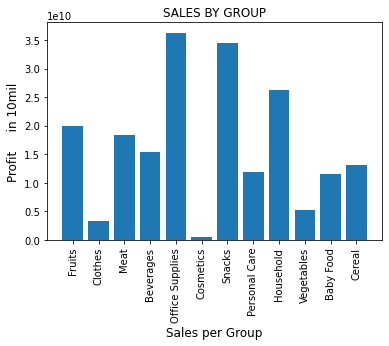

In [10]:
otype=sales.item_type.unique()

plt.bar(otype,sales.groupby(['item_type']).sum()['total_profit'])
plt.xticks(otype,rotation='vertical', size=10)
plt.title('SALES BY GROUP')
plt.ylabel('Profit     in 10mil',size=12)
plt.xlabel('Sales per Group',size=12)
plt.show()

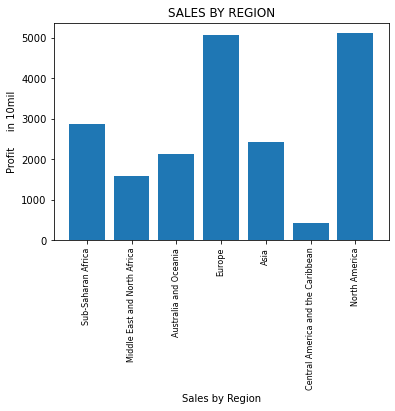

In [11]:
region=sales.region.unique()

plt.bar(region,sales.groupby(['region']).sum()['total_profit']/10000000)
plt.xticks(region,rotation='vertical', size=8)
plt.title('SALES BY REGION')
plt.ylabel('Profit     in 10mil')
plt.xlabel('Sales by Region')
plt.show()

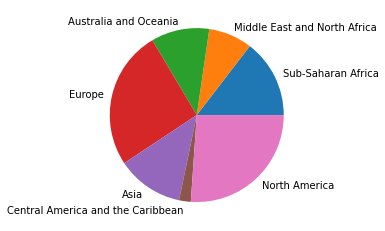

In [12]:
y=sales.region.unique()
x=sales.groupby(['region']).sum()['total_profit']/10000000
plt.pie(x,labels=y)
plt.show()

Here i define some new parametars, by groupy the regions in pairs

In [13]:
country=sales.country.unique()

saharan_africa=sales.loc[sales['region']=='Sub-Saharan Africa']
mid_north_africa=sales.loc[sales['region']=='Middle East and North Africa']
australia=sales.loc[sales['region']=='Australia and Oceania']
europe=sales.loc[sales['region']=='Europe']
asia=sales.loc[sales['region']=='Asia']
central_america=sales.loc[sales['region']=='Central America and the Caribbean']
north_america=sales.loc[sales['region']=='North America']

Ploting the sales made in Saharan Africa by country in milions USD

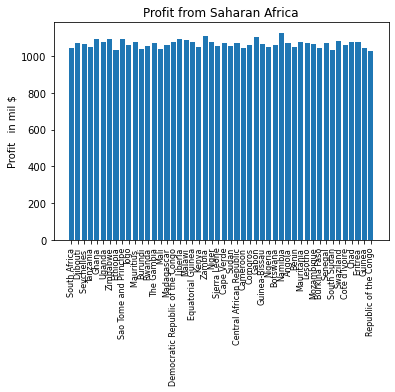

In [14]:
country=saharan_africa.country.unique()

plt.bar(country,saharan_africa.groupby(['country']).sum()['total_profit']/1000000)
plt.xticks(country,rotation='vertical', size=8)
plt.title('Profit from Saharan Africa')
plt.ylabel('Profit   in mil $')
#plt.xlabel('Sales in Saharan Africa')
plt.show()

Ploting the sales made in Europe by country in milions USD

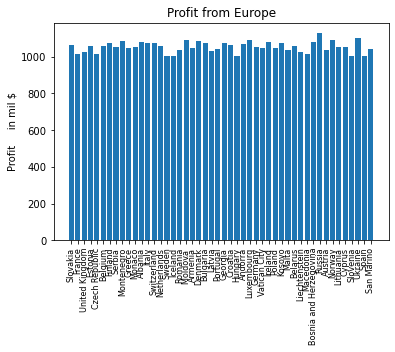

In [15]:
country=europe.country.unique()

plt.bar(country,europe.groupby(['country']).sum()['total_profit']/1000000)
plt.xticks(country,rotation='vertical', size=8)
plt.title('Profit from Europe')
plt.ylabel('Profit     in mil $')
#plt.xlabel('Europe')
plt.show()

Ploting the sales made in North America by country in milions USD

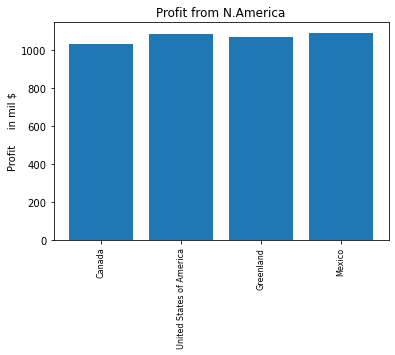

In [16]:
country=north_america.country.unique()

plt.bar(country,north_america.groupby(['country']).sum()['total_profit']/1000000)
plt.xticks(country,rotation='vertical', size=8)
plt.title('Profit from N.America')
plt.ylabel('Profit     in mil $')
#plt.xlabel('Sales by Region')
plt.show()

  
  Profit made of sales in Macedonia by year  
  For this we need to make a new df so its easier to work with it

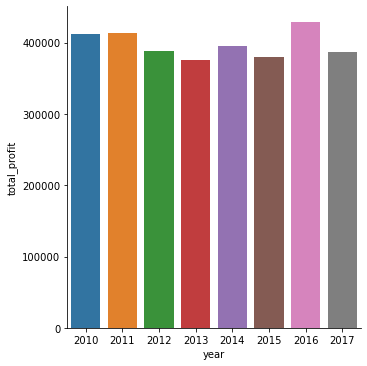

In [17]:
mkd=sales.loc[sales['country'] == 'Macedonia']
sea.catplot(x='year',y='total_profit',data=mkd,kind='bar', ci=None)

Ploting scatter devided by year and total profit by product.  
Not something that will give me much information but it looks nice.

In [18]:
fig = px.scatter(sales, x="item_type", y='year', size="total_profit", color="total_profit",title='Sales')
fig.show()

Subploting the sales graph.  
Since we already have the order date we can extract the month from this field to use for our research.

In [19]:
sales['month']=sales['order_date'].dt.month

In [20]:
profit2=sales.groupby(by=sales['item_type'])['total_profit'].sum()
profit2

item_type
Baby Food          1.987405e+10
Beverages          3.268597e+09
Cereal             1.844934e+10
Clothes            1.533217e+10
Cosmetics          3.626616e+10
Fruits             4.999727e+08
Household          3.451992e+10
Meat               1.193384e+10
Office Supplies    2.622178e+10
Personal Care      5.244776e+09
Snacks             1.150522e+10
Vegetables         1.312417e+10
Name: total_profit, dtype: float64

Here is a subplot from a few parametars so that we can compare the results

In [21]:
profit=sales.groupby(by=sales['year'])['total_profit'].sum()
profit2=sales.groupby(by=sales['item_type'])['total_profit'].sum()
regio=sales.groupby(by=sales['region'])['total_profit'].sum()
months=sales.groupby(by=['month'])['total_profit'].sum()

x=sales['year'].unique()
y=profit/100000

x1=sales['region'].unique()
y1=regio/100000

x2=sales['item_type'].unique()
y2=profit2

x3=sales['month'].unique()
y3=months

fig = make_subplots(rows=2, cols=2, shared_yaxes=True,
                    subplot_titles=("Sales by year","Sales by region","Sales by item type","Sales by month"))

fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(color=x, coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Bar(x=x1, y=y1,
                    marker=dict(color=x, coloraxis="coloraxis")),
              1, 2)

fig.add_trace(go.Bar(x=x2, y=y2,
                    marker=dict(color=x, coloraxis="coloraxis")),
              2, 1)

fig.add_trace(go.Bar(x=x3, y=y3,
                    marker=dict(color=x, coloraxis="coloraxis")),
              2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.show()

Now we can focus on other columns in the data that we can get some information from.  
For example we can use the 'order_priority' to try get some new analysis.

In [22]:
sales.groupby(by='order_priority')['order_priority'].count()

order_priority
C    125042
H    124987
L    125138
M    124833
Name: order_priority, dtype: int64

Now we can use the ordinal encoder to determain the average priority of all the orders by region and item type (as showen below)

In [23]:
ord_enc = OrdinalEncoder()
sales["ww"] = ord_enc.fit_transform(sales[["order_priority"]])
sales.groupby(by='region')['ww'].mean()

region
Asia                                 1.505866
Australia and Oceania                1.500074
Central America and the Caribbean    1.499704
Europe                               1.494315
Middle East and North Africa         1.497710
North America                        1.504981
Sub-Saharan Africa                   1.501303
Name: ww, dtype: float64

In [24]:
ord_enc = OrdinalEncoder()
sales["ww"] = ord_enc.fit_transform(sales[["order_priority"]])
sales[["order_priority", "ww"]].head(11)
sales.groupby(by='item_type')['ww'].mean()

item_type
Baby Food          1.500300
Beverages          1.497381
Cereal             1.500925
Clothes            1.502842
Cosmetics          1.494307
Fruits             1.496401
Household          1.496336
Meat               1.494877
Office Supplies    1.506831
Personal Care      1.494556
Snacks             1.504867
Vegetables         1.504693
Name: ww, dtype: float64

Using the ordinal encoder to transform our result and try to show a contour in 3d plot

In [25]:
priority=sales.groupby(['order_priority','year']).order_priority.count()

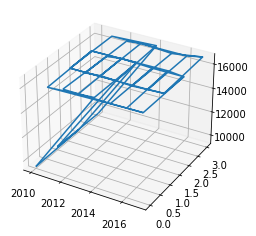

In [26]:
fig = plt.figure(figsize=(8, 4, ))
ax = fig.add_subplot(111, projection='3d')
a=sales['year'].unique()
b=sales['order_priority'].unique()
c=sales.groupby(['order_priority','year'])['order_priority'].count().values
oe = OrdinalEncoder()
b = oe.fit_transform(b.reshape(-1, 1)).ravel()
A, B = np.meshgrid(a, b, sparse=True)
C=c.reshape(4,8)
ax.plot_wireframe(A,B,C)
plt.show()

# **Find what products were sold together as a bundle?

Let's say we have to find which items sold the most together.  
We can now check for items that have been sold together as a bundle, using the 'order_id' column we have  
In order to separate the duplicate ids we need to create a new columns which i named "duplikat"

In [27]:
bundle=sales.copy()
bundle=bundle[bundle['order_id'].duplicated(keep=False)]
bundle

,region,country,item_type,sales_channel,order_priority,order_id,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit,order_date,ship_date,year,month,ww
36,Europe,Belgium,Personal Care,Online,H,222504317,2827,81.73,56.67,231050.71,160206.09,70844.62,2011-11-01,2011-11-20,2011,11,1.0
40,Europe,Serbia,Clothes,Offline,L,222504317,7348,109.28,35.84,802989.44,263352.32,539637.12,2016-07-06,2016-07-13,2016,7,2.0
695,Europe,Belgium,Personal Care,Offline,L,222504317,2727,81.73,56.67,222877.71,154539.09,68338.62,2015-03-24,2015-04-10,2015,3,2.0
909,Europe,Belgium,Personal Care,Offline,L,222504317,4404,81.73,56.67,359938.92,249574.68,110364.24,2015-04-06,2015-05-20,2015,4,2.0
2578,Europe,Slovakia,Vegetables,Online,M,768736827,5165,154.06,90.93,795719.90,469653.45,326066.45,2010-04-09,2010-05-09,2010,4,3.0
2737,Europe,Slovakia,Meat,Online,M,768736827,9362,421.89,364.69,3949734.18,3414227.78,535506.40,2010-04-09,2010-05-09,2010,4,3.0
3482,Europe,Slovakia,Meat,Offline,M,768736827,574,421.89,364.69,242164.86,209332.06,32832.80,2010-04-09,2010-05-09,2010,4,3.0
3495,Europe,Macedonia,Clothes,Offline,H,185007894,6802,109.28,35.84,743322.56,243783.68,499538.88,2013-03-28,2013-04-20,2013,3,1.0
4284,Europe,Macedonia,Clothes,Online,C,185007894,5415,109.28,35.84,591751.20,194073.60,397677.60,2013-03-28,2013-04-20,2013,3,0.0
4998,Europe,Macedonia,Office Supplies,Online,M,185007894,987,651.21,524.96,642744.27,518135.52,124608.75,2013-03-28,2013-04-20,2013,3,3.0


In [28]:
bundle['duplikat']=bundle.groupby('order_id')['item_type'].transform(lambda x: ','.join(x))
bundle.head()

,region,country,item_type,sales_channel,order_priority,order_id,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit,order_date,ship_date,year,month,ww,duplikat
36,Europe,Belgium,Personal Care,Online,H,222504317,2827,81.73,56.67,231050.71,160206.09,70844.62,2011-11-01,2011-11-20,2011,11,1.0,"Personal Care,Clothes,Personal Care,Personal Care"
40,Europe,Serbia,Clothes,Offline,L,222504317,7348,109.28,35.84,802989.44,263352.32,539637.12,2016-07-06,2016-07-13,2016,7,2.0,"Personal Care,Clothes,Personal Care,Personal Care"
695,Europe,Belgium,Personal Care,Offline,L,222504317,2727,81.73,56.67,222877.71,154539.09,68338.62,2015-03-24,2015-04-10,2015,3,2.0,"Personal Care,Clothes,Personal Care,Personal Care"
909,Europe,Belgium,Personal Care,Offline,L,222504317,4404,81.73,56.67,359938.92,249574.68,110364.24,2015-04-06,2015-05-20,2015,4,2.0,"Personal Care,Clothes,Personal Care,Personal Care"
2578,Europe,Slovakia,Vegetables,Online,M,768736827,5165,154.06,90.93,795719.90,469653.45,326066.45,2010-04-09,2010-05-09,2010,4,3.0,"Vegetables,Meat,Meat"


In [29]:
df2=bundle[['order_id','duplikat']].drop_duplicates()
df2.head()

,order_id,duplikat
36,222504317,"Personal Care,Clothes,Personal Care,Personal Care"
2578,768736827,"Vegetables,Meat,Meat"
3495,185007894,"Clothes,Clothes,Office Supplies"
5307,345636594,"Cosmetics,Personal Care,Personal Care"


Now i can select a specific item bundle, by changing the number of item i am looking for that sold together.

In [30]:
count= Counter()

for row in df2['duplikat']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,3)))
    
count.most_common()

[(('Personal Care', 'Clothes', 'Personal Care'), 2),
 (('Personal Care', 'Personal Care', 'Personal Care'), 1),
 (('Clothes', 'Personal Care', 'Personal Care'), 1),
 (('Vegetables', 'Meat', 'Meat'), 1),
 (('Clothes', 'Clothes', 'Office Supplies'), 1),
 (('Cosmetics', 'Personal Care', 'Personal Care'), 1)]

From this we can conclude that the things sold together most are 'Personal Care' products

# **Find the most profitable month over the period

In order to find the most profitable month in the year, we need to create a new column where we can extract the month from our date column.  
We can now use this to do our research.

In [31]:
xx=round(sales.groupby(['year','month']).sum()['total_profit']/10000000, 2)
print(xx)

year  month
2010  1        212.65
      2        199.95
      3        212.76
      4        213.38
      5        216.67
                ...  
2017  3        214.74
      4        212.39
      5        220.82
      6        215.12
      7        203.03
Name: total_profit, Length: 91, dtype: float64


Pivoting the results makes it much more easier to read and understand.

In [32]:
xx1=xx.unstack()
xx1.head(12)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,212.65,199.95,212.76,213.38,216.67,209.23,222.78,226.43,215.42,217.10,216.98,217.00
2011,224.47,195.93,221.38,216.73,215.51,208.25,222.28,214.39,207.53,224.98,218.99,223.03
2012,220.68,201.14,218.22,209.24,220.07,217.75,218.82,216.67,207.15,219.37,210.16,216.87
2013,223.62,203.25,222.95,208.83,224.38,203.22,215.89,220.02,216.70,231.11,210.06,214.93
2014,212.80,195.88,223.41,213.42,224.49,218.24,219.32,221.06,212.89,220.09,209.99,224.96
2015,221.65,191.92,217.63,208.17,217.63,216.01,223.12,220.71,215.53,219.38,211.46,225.58
2016,220.96,207.89,220.79,217.73,222.22,214.27,214.73,218.47,213.18,218.35,223.50,219.04
2017,221.44,195.06,214.74,212.39,220.82,215.12,203.03,NaN,NaN,NaN,NaN,NaN


In [33]:
df = sales.copy()
table = pd.pivot_table(df, index=['month','year'], values='total_profit', aggfunc=[np.max,np.min], margins=True)
cm = sea.light_palette("green", as_cmap=True)
table2=table.style.background_gradient(cmap=cm)
table2

From the table we see which month was the best and worst in each year

## Find the delay of the orders with meat in Macedonia made online

Add new column 'delayed' so we can show the day difference between ordering and delivery of the products

In [34]:
sales['delayed']=(sales.ship_date-sales.order_date)

In [35]:
print("max delay",sales.delayed.max())
print("min delay",sales.delayed.min())
print("mean delay",sales.delayed.mean())

max delay 50 days 00:00:00
min delay 0 days 00:00:00
mean delay 25 days 00:03:02.304000


To use this column for some exploration we need to transform it to int values, which we can manipulate.

In [36]:
sales['delayed']=sales.delayed.dt.days

In [37]:
we=sales.delayed.sum()

In [38]:
category=sales.item_type.unique()
ye=round(sales.groupby(by=['item_type','year'])['delayed'].mean(),2)
ye.unstack()

year,2010,2011,2012,2013,2014,2015,2016,2017
item_type,,,,,,,,
Baby Food,24.71,24.81,25.07,25.38,24.75,25.07,25.23,25.45
Beverages,25.29,25.32,24.65,25.06,25.12,25.13,25.27,24.42
Cereal,25.24,24.99,24.74,24.84,25.06,24.93,24.70,24.48
Clothes,24.85,25.09,25.02,25.24,24.92,24.66,24.78,25.39
Cosmetics,25.04,25.42,24.99,24.80,24.78,24.93,25.16,24.04
Fruits,24.67,24.67,24.95,25.18,24.89,24.86,25.35,25.75
Household,25.13,25.20,25.21,24.81,24.84,25.69,25.61,23.67
Meat,24.46,25.09,24.82,25.43,24.98,25.05,25.26,25.50
Office Supplies,24.97,25.21,25.07,25.18,24.46,25.14,25.22,24.26


In [39]:
sale1=sales.copy()
bins = [0, 15, 20, 30,45, np.inf]
sale1['delayed'] = pd.cut(sale1['delayed'], bins)
sale1.delayed.unique()

[(0.0, 15.0], (30.0, 45.0], (15.0, 20.0], (45.0, inf], (20.0, 30.0], NaN]
Categories (5, interval[float64]): [(0.0, 15.0] < (15.0, 20.0] < (20.0, 30.0] < (30.0, 45.0] < (45.0, inf]]

Total profit made depending on the delayed delivery, with different bins.

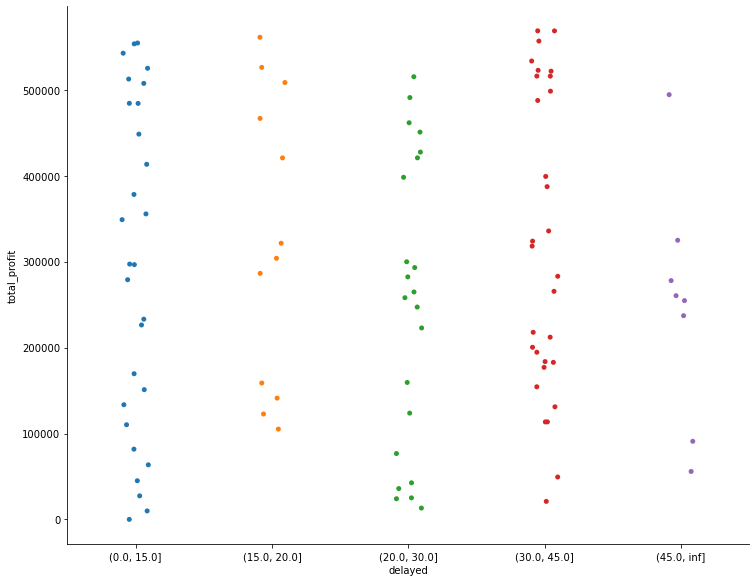

In [40]:
%matplotlib inline
meat=sale1.loc[sales['item_type'] == 'Meat']
tip=meat.loc[meat['sales_channel'] == 'Online']
mkd=tip.loc[tip['country'] == 'Macedonia']
sea.catplot(y='total_profit',x='delayed',data=mkd,hue= 'delayed',ci=None, legend_out=True, height=8, aspect=11.7/9)

In [41]:
sale1['delayed'].value_counts()

(0.0, 15.0]     146978
(30.0, 45.0]    146963
(20.0, 30.0]     98091
(15.0, 20.0]     49078
(45.0, inf]      49051
Name: delayed, dtype: int64

In [42]:
macedonia=sales[sales['country']=='Macedonia']
macedonia.to_csv('Macedonia.csv', index=False)
macedonia=pd.read_csv('Macedonia.csv')

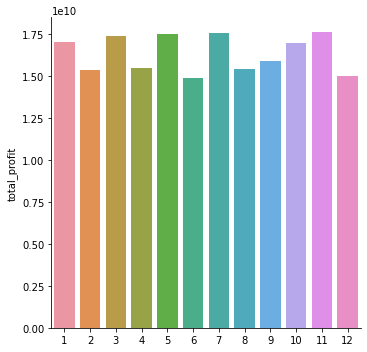

In [43]:
sea.catplot(x=sales.month.unique(),y=sales.groupby('month')['total_profit'].sum(), data=sales, kind='bar')

## Create subsets from the existing that we can furder develop the analysis on

For the example we will only create one of each tipe that we can further explore additionaly.


separeted by REGION

In [44]:
euro=sales[sales['region']=='Europe']
euro.to_csv('europe.csv', index=False)
europe=pd.read_csv('europe.csv')

separated by ITEM TYPE

In [45]:
house=sales[sales['item_type']=='Household']
house.to_csv('house.csv', index=False)
household=pd.read_csv('house.csv')

separated by YEAR

In [46]:
years11=sales[sales['year']==2011]
years11.to_csv('years11.csv', index=False)
year2011=pd.read_csv('years11.csv')

separated by COUNTRY

In [47]:
macedonia=sales[sales['country']=='Macedonia']
macedonia.to_csv('Macedonia.csv', index=False)
macedonia=pd.read_csv('Macedonia.csv')

We can also use a few conditions in the grouping arrguments to create different sets

As an example we can combine Central and North America in one set called AMERICA

In [48]:
other_goods=sales[sales['item_type'].isin(['Clothes','Beverages','Office Supplies','Cosmetics','Personal Care', 'Household',])]
other_goods.to_csv('others.csv', index=False)
other_goods=pd.read_csv('others.csv')

In [49]:
america=sales[sales['region'].isin(['Central America and the Caribbean', 'North America'])]
america.to_csv('america.csv', index=False)
america=pd.read_csv('america.csv')

## We can even create new columns from here so we can get some comparative analysis and furder develop the knowledge on the data that we have.

We group the food products so that we can compare it to the rest and see the profit made from them.

In [50]:
food=['Fruits','Meat','Snacks','Vegetables','Baby Food', 'Cereal']
sales['foods']=sales['item_type'].apply(lambda x: 'food' if x in food else 'other')
new = sales[['region', 'total_revenue','units_sold','total_profit','year', 'foods','month']].copy()
new

,region,total_revenue,units_sold,total_profit,year,foods,month
0,Sub-Saharan Africa,14862.69,1593,3839.13,2012,food,7
1,Middle East and North Africa,503890.08,4611,338631.84,2013,other,9
2,Australia and Oceania,151880.40,360,20592.00,2015,food,5
3,Sub-Saharan Africa,61415.36,562,41273.28,2017,other,5
4,Europe,188518.85,3973,62217.18,2016,other,10
...,...,...,...,...,...,...,...
499995,Asia,1679.40,180,433.80,2015,food,1
499996,Australia and Oceania,4614474.06,7086,894607.50,2011,other,1
499997,Europe,664333.32,4354,240079.56,2017,food,1
499998,Asia,405792.40,8552,133924.32,2016,other,3


In [51]:
new.groupby(by=['foods'])['total_profit'].sum()/10000000

foods
food      7538.658574
other    12085.339656
Name: total_profit, dtype: float64

# Using heatmap for comparative view on the data

In [52]:
data=macedonia
fig = go.Figure(data=go.Heatmap(x=macedonia.month,y=macedonia.item_type,z=macedonia.total_profit,hoverongaps = False))
fig.update_layout(title="Profit made by Month")
fig.show()

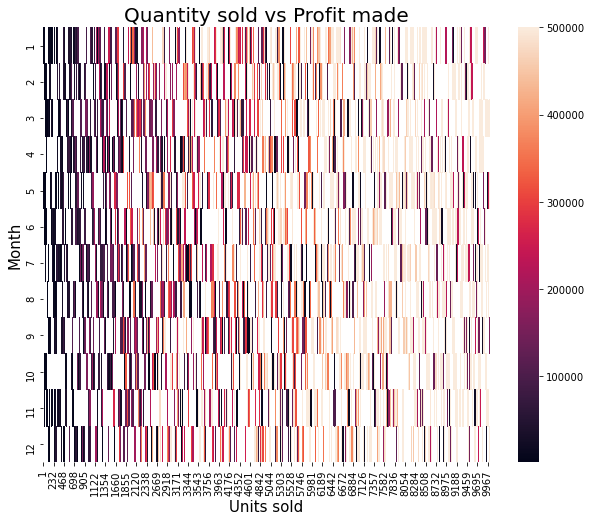

In [53]:
pivot = macedonia.pivot_table(columns='units_sold',index='month',aggfunc='sum',values='total_profit')
pivot.columns = pivot.columns.astype(int)
plt.figure(figsize=(10,8))
ax = sea.heatmap(pivot, vmin=1000, vmax=500000)
ax.set_title('Quantity sold vs Profit made').set_size(20)
ax.set_xlabel('Units sold').set_size(15)
ax.set_ylabel('Month').set_size(15)

In [54]:
new2=new.copy()

In [55]:
data=new2
fig = go.Figure(data=go.Heatmap(x=new2.year,y=new2.month,z=new2.total_profit,hoverongaps = False))
fig.update_layout(title="Profit over the years by Month")
fig.show()

In [56]:
fig = go.Figure(data=go.Heatmap(x=new2.region,y=new2.year,z=new2.total_profit,hoverongaps = False))
fig.update_layout(title="Profit over the years by Region")
fig.show()

In [57]:
pivot2 = new2.pivot_table(columns='year',index='region',aggfunc='sum',values='units_sold')
pivot2.columns = pivot2.columns.astype(int)
pivot2

year,2010,2011,2012,2013,2014,2015,2016,2017
region,,,,,,,,
Asia,47686772,47930605,47909266,48279149,47788830,47538581,48969649,28020107
Australia and Oceania,26738025,26590880,27155924,27349971,26977068,26591693,26418218,15075170
Central America and the Caribbean,35227691,35365223,35085055,35544766,35732537,36226476,36136325,20366320
Europe,85994250,85200986,84765251,85505442,84875932,85075703,86530701,48467903
Middle East and North Africa,41118355,40774771,40305246,40980154,41813022,40862219,41133046,23372563
North America,7026980,7406139,7159616,7183683,7188486,6962811,7070037,4238091
Sub-Saharan Africa,85671490,86836011,86126189,86045928,84970900,86254611,86415239,49531999


  
  From the table we can see that the region plot wont be interesting, sisnce the quantity is almost the same every year.  
  
  

# Using relplots to see the relations in the data

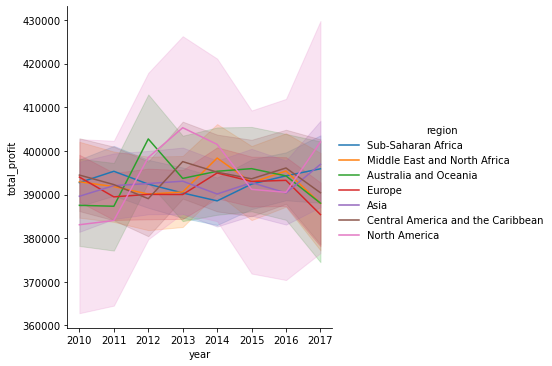

In [58]:
sea.relplot(x=new["year"], y=new["total_profit"], hue=new["region"],
            kind="line", data=new);

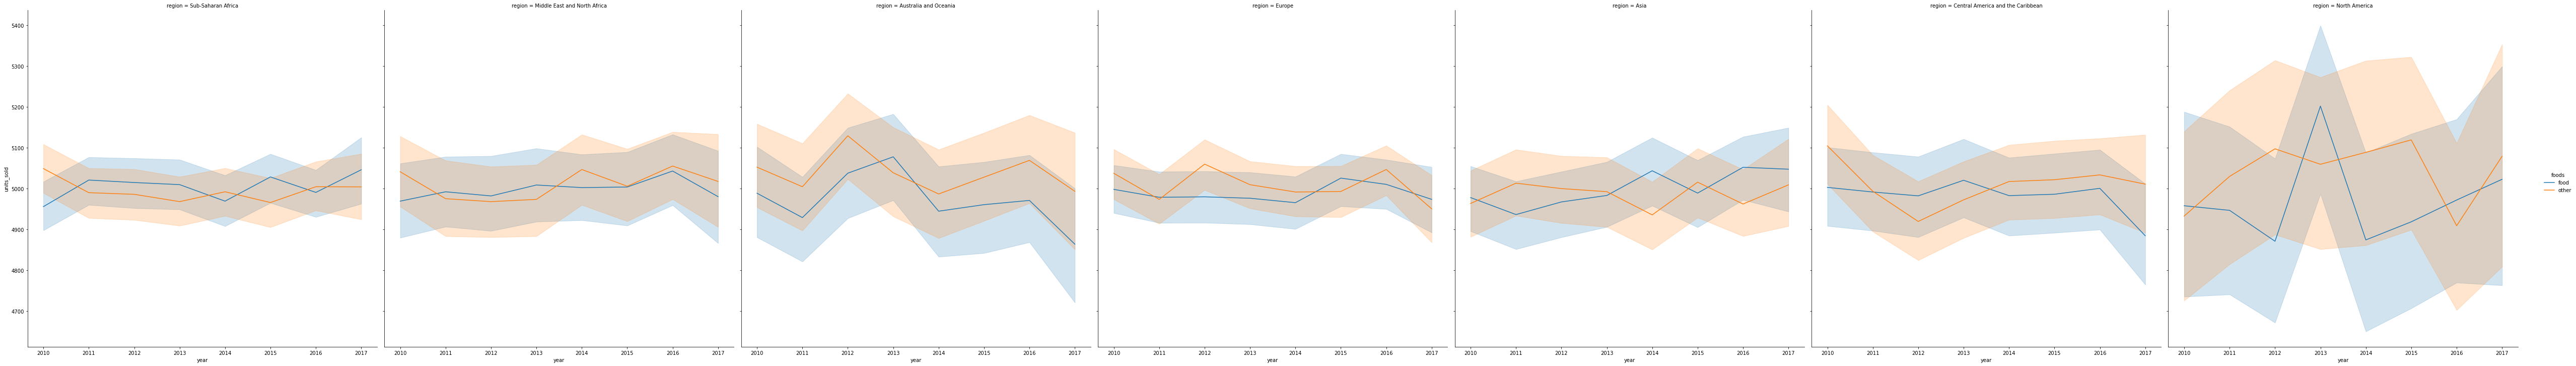

In [59]:
fig=sea.relplot(x=new["year"], y=new["units_sold"], hue=new["foods"],
            col=new["region"], height=10,kind="line", data=new)
fig.set_title=('Food type sold over the years')

Unfortunately with this data set we can't make any prediction model since it has almost identical data in all the parametars (one downside on generated data sets). It has nearly perfect distribution which makes it hard for the model to make any predictions.